# 지도학습 회귀 미리보기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### 농어 무게 예측하기 
- K-최근접 이웃 회귀 모델을 통해 길이값으로 무게를 예측

##### 데이터 로드 및 정제 -> 전처리 -> 시각화 (EDA)

In [22]:
# 데이터 준비
# - 입력 데이터 : 길이 
# - 정답 데이터(라벨) : 무게 

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape   # 결측치 확인

((56,), (56,))

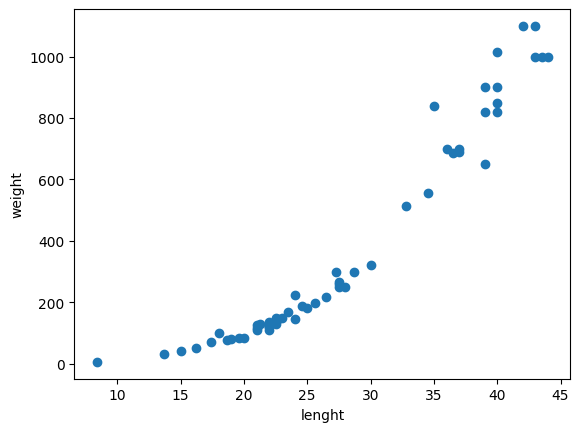

In [3]:
# 데이터 시각화 
plt.scatter(perch_length, perch_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [4]:
# 훈련-평가 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)   # testsize = 0.2 기본값

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((42,), (14,), (42,), (14,))

In [5]:
# 배치 차원 추가(sklearn 라이브러리가 2차원 입력 배열을 기대함)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

train_input.shape, test_input.shape

((42, 1), (14, 1))

#####  훈련

In [6]:
from sklearn.neighbors import KNeighborsRegressor   # 회귀모델

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


##### 평가
- 결정계수 $R^2$ : 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 의미 
$$
    결정계수 = 1 - \frac{(실제값 - 예측값)^2의 합}{(실제값 - 평균)^2의 합}
$$

In [7]:
knr.score(test_input, test_label)    # 정확한 성능을 보임. 

0.992809406101064

##### 예측

In [8]:
knr.predict([[30]])

array([311.4])

In [9]:
distance, index = knr.kneighbors([[30]])

distance, index

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [10]:
# 예측 결과 == 최근접 이웃 k개(5개) 무게 값의 평균치 
train_label[index].mean()    # 근접 데이터의 평균 = 예측값과 동일

np.float64(311.4)

##### 최근접 이웃 모델의 한계 
1. 학습방법에서의 한계 : 학습데이터의 용량이 클 경우, 메모리에 로드할 때의 문제 (모든 데이터를 로드해서 가지고 있어야 함)
2. 추론방법에서의 한계 : 메모리에 로드된 데이터포인트만 대상으로 예측하므로 한계점에서 취약 

In [11]:
knr.predict([[50], [100]])  # 한계점에서 취약

array([1010., 1010.])

### 선형회귀 모델
- 속성에 따라 회귀 계수와 절편을 학습하고, 이를 통해 예측

##### 컬럼이 하나인 경우
$y=wx + b$
1. 회귀계수 w (=기울기, 가중치, weight, coefficient)
2. 절편 b (=편향, bias, intercept)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print(lr.coef_)              # 회귀계수
print(lr.intercept_)         # 절편

[39.01714496]
-709.0186449535474


In [14]:
# 예측값 직접 계산
w = lr.coef_
b = lr.intercept_

x = np.array([50, 100])
y = w * x + b

print(y)

[1241.83860323 3192.69585141]


In [15]:
# 모델을 통한 예측
lr.predict([[50], [100]])

array([1241.83860323, 3192.69585141])

In [16]:
# 평가 
lr.score(test_input, test_label)

0.824750312331356

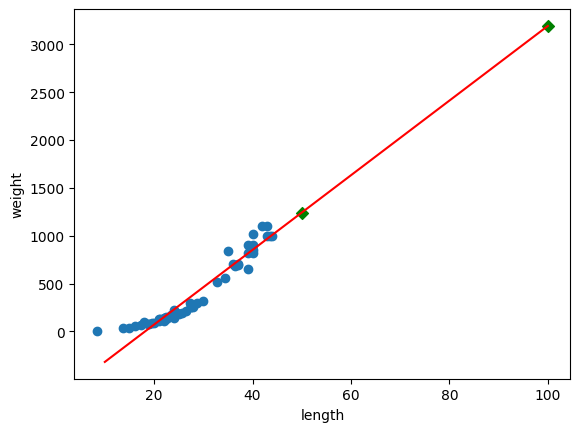

In [17]:
# 시각화 
plt.scatter(perch_length, perch_weight)
plt.scatter(50, w*50 + b, color = 'green', marker='D')
plt.scatter(100, w*100 + b, color = 'green', marker='D')
plt.plot([10, 100], [w*10+b, w*100+b], color = 'red')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 컬럼이 여러 개인 경우 
$y = w_1x_1 + w_2x_2 + w_3x_3 + ... + b$
1. 회귀 계수 여러 대 
2. 절편 한 개 

In [20]:
perch_df = pd.read_csv('./data/perch_full.csv')    # 데이터 프레임 형태 (입력데이터를 ndarray 형태의 파일로 처리해줘야함)
perch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [21]:
perch_df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [24]:
# 입력 데이터 
perch_full = perch_df.to_numpy()
perch_full.shape

(56, 3)

In [25]:
# 정답 데이터
perch_weight.shape

(56,)

In [39]:
# 훈련-테스트 데이터 분리 
train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state=42)

In [47]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# 가중치, 절편 -> 직접 계산 
w1, w2, w3 = lr.coef_
b = lr.intercept_

x1, x2, x3 = 20.2, 5.08, 2.77
w1 * x1 + w2 * x2 + w3 * x3 + b


np.float64(42.299775139161625)

In [49]:
# 예측
lr.predict([[20.2, 5.08, 2.77]])    # 정확한 성능을 보임.   # 99퍼 

array([42.29977514])

In [50]:
#평가 
lr.score(test_input, test_label)

0.8796419177546367

In [51]:
lr.score(train_input, train_label)     # 과적합 상태. (train 데이터에 너무 잘 맞춰져 있어서 test 예측이 어려움)

0.9559326821885706

### 특성 공학 (Feature Enginieering)
- 기계 학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리 
    - 특성 생성
    - 특성 변환
    - 결측치 처리
    - 차원 축소
    - 범주형 데이터 처리 (인코딩)

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)    # include_bias : 편향값 포함 여부(상수 추가 = True), 특성을 변환시켜주는 아이(fit, transform 사용)  # bias 기본값 True, degree 기본값 2
poly.fit([[4, 5]])
poly.transform([[4, 5]])      # array([[ 4.,  5., 16., 20., 25.]]) : 특성을 5개 가진 걸로 변환 (x 값으로 사용)

array([[ 4.,  5., 16., 20., 25.]])

In [55]:
poly.get_feature_names_out()      # transform 되는 방식 확인 

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [56]:
poly = PolynomialFeatures(include_bias=False, degree = 3)    # degree : 차원 확대 시 최대값으로 가지는 것의 제곱을 결정(차원 확장 지정)
poly.fit([[4, 5]])
poly.transform([[4, 5]])       # 9차원으로 데이터 확장  

array([[  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [57]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [59]:
poly =PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)     # 데이터 갯수 3개 -> 9차원으로 확장
poly_perch = poly.transform(perch_full)
poly_perch

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

In [60]:
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [61]:
lr = LinearRegression()
lr. fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
lr.score(test_input, test_label), lr.score(train_input, train_label)   # (0.9714559911594125, 0.9903183436982126) : 과적합 방지

(0.9714559911594125, 0.9903183436982126)

- degree(차수)를 2부터 5까지 늘려보기

In [72]:
# (degree가 2차일 때 학습데이터에 대한 score, 평가 데이터에 대한 score)
poly =PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)    
poly_perch = poly.transform(perch_full)
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)
lr = LinearRegression()
lr. fit(train_input, train_label)
print(lr.score(test_input, test_label), lr.score(train_input, train_label))

# (degree가 3차일 때 학습데이터에 대한 score, 평가 데이터에 대한 score)
poly =PolynomialFeatures(include_bias=False, degree=3)
poly.fit(perch_full)    
poly_perch = poly.transform(perch_full)
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)
lr = LinearRegression()
lr. fit(train_input, train_label)
print(lr.score(test_input, test_label), lr.score(train_input, train_label))

# (degree가 4차일 때 학습데이터에 대한 score, 평가 데이터에 대한 score)
poly =PolynomialFeatures(include_bias=False, degree=4)
poly.fit(perch_full)    
poly_perch = poly.transform(perch_full)
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)
lr = LinearRegression()
lr. fit(train_input, train_label)
print(lr.score(test_input, test_label), lr.score(train_input, train_label))

# (degree가 5차일 때 학습데이터에 대한 score, 평가 데이터에 대한 score)
poly =PolynomialFeatures(include_bias=False, degree=5)
poly.fit(perch_full)    
poly_perch = poly.transform(perch_full)
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)
lr = LinearRegression()
lr. fit(train_input, train_label)
print(lr.score(test_input, test_label), lr.score(train_input, train_label))


a = 2
for i in range(4) :
    poly = PolynomialFeatures(include_bias=False, degree=a)
    poly.fit(perch_full)    
    poly_perch = poly.transform(perch_full)
    train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)
    lr = LinearRegression()
    lr. fit(train_input, train_label)
    print(f'{a}차 일 때의 값: ', lr.score(train_input, train_label), lr.score(test_input, test_label))
    a = a+1


# 0.9714559911594125 0.9903183436982126    # 적절한 차수를 구하기 
# 0.9410534492198891 0.9963872340980141    # 학습 데이터의 경우, 차수가 늘어나면 적중률이 올라갈 수 밖에 없음. 
# -6.786696932218207 0.9995286898073679    # 평균보다 더 못맞추는 상황 R^2 계수에서 분자의 값이 1보다 커졌다는 것을 의미 (음수 반환)
# -144.40564483377855 0.9999999999997232


0.9714559911594125 0.9903183436982126
0.9410534492198891 0.9963872340980141
-6.786696932218207 0.9995286898073679
-144.40564483377855 0.9999999999997232
2차 일 때의 값:  0.9903183436982126 0.9714559911594125
3차 일 때의 값:  0.9963872340980141 0.9410534492198891
4차 일 때의 값:  0.9995286898073679 -6.786696932218207
5차 일 때의 값:  0.9999999999997232 -144.40564483377855


### 과대적합 & 과소적합
**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화되지 않은 상태 
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태 
- 훈련 데이터의 잡음(noise)까지 학습된 상태 
- 해결 방법
    - 데이터 셋의 복잡도 줄이기 
    - 학습할 데이터의 양을 늘리기
    - L1, L2가 적용된 규제 모델 사용하기

**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태 
- 속성을 제대로 분석하지 못한 상태 
- 훈련 데이터에 대한 평가조차 좋지 않은 상태 
- 해결 방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기